In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pipeline_
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None
from rfpimp import *
from sklearn.metrics import recall_score, roc_curve

In [2]:
df = pd.read_csv('data/churn_train.csv',parse_dates=['last_trip_date','signup_date'])
X = df

In [3]:
current_date = pd.to_datetime('2014-7-1')
y = pipeline_.create_target_data(df,current_date)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
p = Pipeline([('dum', pipeline_.CreateDummies()),
             ('col', pipeline_.DropColumns(['phone','city','last_trip_date','signup_date'])),
             ('boo', pipeline_.BooleanField()),
             ('feat', pipeline_.CreateFeatures()),
             ('imp', pipeline_.ImputeValues()),
             ('grad', GradientBoostingClassifier(n_estimators=1000,learning_rate=.01,max_depth=3))])

In [6]:
p.fit(X_train,y_train)
predictions = p.predict(X_train)

In [7]:
np.mean(predictions==y_train)

0.79128125

In [8]:
parameters = {'grad__n_estimators':[500,1000,3000],'grad__max_depth':[2,3,5,8],'grad__learning_rate':[0.1]}

In [9]:
grid_search =pipeline_.pipeline_grid_search(X_train,y_train,p,parameters,'recall')

In [10]:
grid_search.best_params_

{'grad__learning_rate': 0.1, 'grad__max_depth': 3, 'grad__n_estimators': 500}

In [11]:
test_p = Pipeline([('dum', pipeline_.CreateDummies()),
             ('col', pipeline_.DropColumns(['phone','city','last_trip_date','signup_date'])),
             ('boo', pipeline_.BooleanField()),
             ('feat', pipeline_.CreateFeatures()),
             ('imp', pipeline_.ImputeValues())])
test_p.fit(X_test,y_test)
X_test_clean = test_p.transform(X_test)

In [12]:
p0 = Pipeline([
        ('dummies', pipeline_.CreateDummies()),
        ('luxury', pipeline_.BooleanField()),
        ('ratings', pipeline_.DriverDummies()),
        ('one_timers', pipeline_.CreateFeatures()),
                 ('imp', pipeline_.ImputeValues()),
        ('drops', pipeline_.DropColumns(['phone','city','last_trip_date','signup_date'])),
        ('rf_classifier', RandomForestClassifier(criterion='entropy', max_depth=1, max_features='log2', n_estimators=50,n_jobs=-1))])

In [13]:
p0.fit(X,y)

Pipeline(memory=None,
     steps=[('dummies', CreateDummies()), ('luxury', BooleanField()), ('ratings', DriverDummies()), ('one_timers', CreateFeatures()), ('imp', ImputeValues()), ('drops', DropColumns(drop_columns=['phone', 'city', 'last_trip_date', 'signup_date'])), ('rf_classifier', RandomForestClassifier(bootstrap=True, ..._jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [14]:
predicted_train = p0.predict(X)
recall_score(y,predicted_train)

0.9331544376802307

In [15]:
test_df = pd.read_csv('data/churn_test.csv',parse_dates=['last_trip_date','signup_date'])
X_test = test_df
current_date = pd.to_datetime('2014-7-1')
y_test = pipeline_.create_target_data(test_df,current_date)

In [16]:
p0t = Pipeline([
        ('dummies', pipeline_.CreateDummies()),
        ('luxury', pipeline_.BooleanField()),
        ('ratings', pipeline_.DriverDummies()),
        ('one_timers', pipeline_.CreateFeatures()),
                 ('imp', pipeline_.ImputeValues()),
        ('drops', pipeline_.DropColumns(['phone','city','last_trip_date','signup_date']))])

In [17]:
predicted_test = p0.predict(X_test)
recall_score(y_test, predicted_test)

0.9309569685292228

In [18]:
X_train

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,iPhone,Android,King's Landing,Winterfell,Astapor
19774,5.52,5.0,3.0,1.00,King's Landing,2014-01-24,NaN,2014-01-24,0.0,1,True,100.0,0,0,1,0,0
25799,2.62,4.6,2.7,1.02,Winterfell,2014-06-28,iPhone,2014-01-17,5.0,1,True,50.0,1,0,0,1,0
8791,12.22,5.0,5.0,1.00,King's Landing,2014-01-20,Android,2014-01-20,0.0,1,True,100.0,0,1,1,0,0
26133,3.53,4.7,4.5,1.00,Winterfell,2014-06-19,Android,2014-01-03,0.0,2,False,40.0,0,1,0,1,0
30803,9.04,5.0,5.0,1.00,Astapor,2014-02-06,iPhone,2014-01-18,0.0,2,True,100.0,1,0,0,0,1
17287,2.27,4.8,4.2,1.13,Astapor,2014-06-23,iPhone,2014-01-09,25.0,0,True,87.5,1,0,0,0,1
34906,1.68,5.0,NaN,1.00,Astapor,2014-03-22,iPhone,2014-01-23,0.0,0,True,100.0,1,0,0,0,1
36679,3.30,4.4,3.8,1.00,Winterfell,2014-02-11,iPhone,2014-01-14,0.0,9,False,66.7,1,0,0,1,0
31981,3.47,5.0,5.0,1.75,King's Landing,2014-07-01,iPhone,2014-01-14,100.0,0,False,100.0,1,0,1,0,0
34510,3.22,5.0,NaN,1.50,Winterfell,2014-03-02,iPhone,2014-01-08,100.0,0,False,0.0,1,0,0,1,0


Text(0,0.5,'Average Surge')

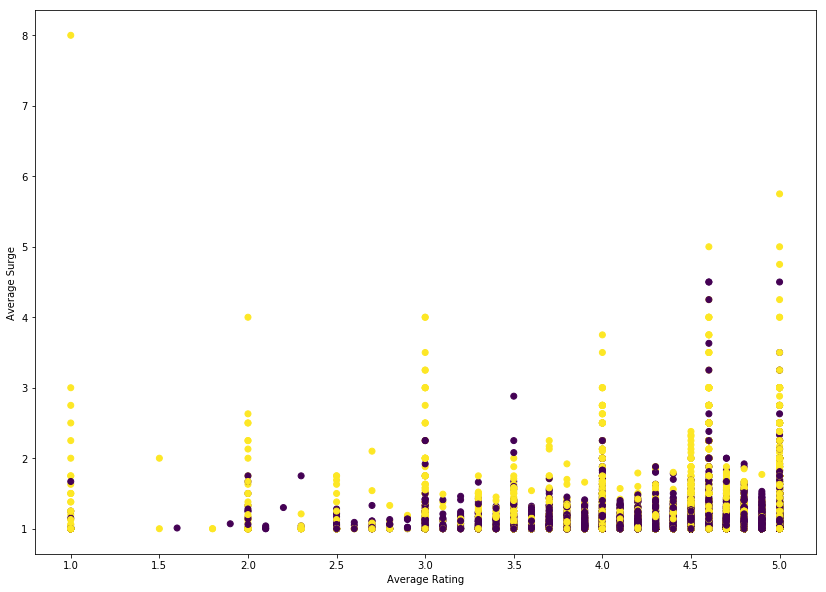

In [80]:
fig, axs = plt.subplots(figsize=(14,10))
plt.scatter(X_train['avg_rating_of_driver'],X_train['avg_surge'],c=y_train)
X_train['avg_rating_of_driver'].shape
plt.xlabel('Average Rating')
plt.ylabel('Average Surge')
